
# 01. Librería Numpy. Estructura de datos, acceso, operaciones

#### Contenidos:
* [Creación de arrays](#Creación-de-arrays)
* [Lectura y escritura de ficheros / datos](#Lectura-y-escritura-de-ficheros-/-datos)
* [Procesamiento de datos / Funciones de reducción/agregación](#Procesamiento-de-datos-/-Funciones-de-reducción/agregación)
* [Álgebra lineal](#Álgebra-lineal)
* [Más funcionalidades de numpy](#Más-funcionalidades-de-numpy)


El paquete (módulo) `numpy`  se utiliza prácticamente en todas las operaciones numéricas en Python. Es el paquete que nos provee de las herramientas necesarias para trabajar con vectores, matrices y otras estructuras de mayores dimensiones en Python. El gran rendmiento que ofrece para realizar cálculos con este tipo de estructuras lo hace uno de los paquetes más utilizados de Python. Está implementado en C y Fortran, por lo que las operaciones vectorizadas (aquellas formuladas con vectores y matrices) se ejecutan realmente rápido.

Para utilizar `numpy` lo primero que debemos hacer es importarlo.

La forma más habitual de hacerlo es la siguiente.

In [1]:
import numpy as np

Por tanto, a partir de ahora cada vez que vayamos a usar funciones definidas en `numpy` lo haremos con el prefijo `np`.

En `numpy` el término utilizado para denominar a los vectores, matrices o conjuntos de datos de más dimensiones es *array*.

Vamos a comenzar viendo cómo podemos crear arrays en `numpy`.

# Creación de arrays

Existen diferentes formas mediante las cuales podemos crear nuevos arrays de numpy. Por ejemplo:

* A partir de una lista o tupla de Python
* Usando funciones dedicadas a generar arrays de numpy como `arange`, `linspace`, etc.
* Leyendo datos desde ficheros

### A partir de listas de Python

Para crear un nuevo array vector o matriz a partir de una lista de Python podemos usar la función `numpy.array`.

In [2]:
# Un vector: El argumento a la función array es una lista de Python
v = np.array([1,2,3,4])

v

array([1, 2, 3, 4])

In [3]:
# Una matriz: El argumetno a la función array es una lista anidada de Python (lista de listas)
M = np.array([[1, 2], [3, 4]])

M

array([[1, 2],
       [3, 4]])

Tanto `v` como `M` son dos objetos de tipo `ndarray` de `numpy`.

In [4]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

La diferencia entre ambos arrays (`v` y `M`) es solo su forma (*shape*). Podemos obtener más información sobre la forma de un array mediante la propiedad `ndarray.shape`.

In [5]:
v.shape

(4,)

In [6]:
M.shape

(2, 2)

El número de elementos total en el array está disponible a través de la propiedad `ndarray.size`.

In [7]:
M.size

4

Igualmente, podríamos utilizar la fuciones `numpy.shape` y `numpy.size` (en vez usar las propiedades del objeto).

In [8]:
np.shape(M)

(2, 2)

In [9]:
np.size(M)

4

### Un avance de sus ventajas
¿Por qué es útil `numpy`? Veámoslo con un rápido ejemplo. 

¿Somos capaces de sumar los valores de dos listas en Python directamente? No...

Pero con numpy podemos trabajar directamente con los vectores y matrices y realizar todo tipo de operaciones de manera rápida y sencilla.

In [10]:
# Suma de dos listas de Python
l = [1, 2]
l2 = [2, 5]
# la suma de listas es una nueva lista, no la suma de sus valores....
l + l2

[1, 2, 2, 5]

In [3]:
# para sumarlo debemos hacerlo elemento por elemento
suma2 = []
for i in range(len(l)):
    suma2.append(l[i] + l2[i]) 
suma2

[3, 7]

No es muy intuitivo... ¿Y con `numpy`?

In [4]:
arrayL = np.array(l)
arrayL2 = np.array(l2)

# Así de fácil...
arrayL + arrayL2

array([3, 7])

Por tanto, aunque en un principio los arrays `numpy.ndarray` se parecen bastante a las listas de Python (o listas de listas), hay muchas razones por las que nos conviene utilizar `numpy` en vez de trabajar con listas.

* Las listas de Python son muy generales. Pueden almacenar cualquier tipo de objeto. Son tipadas dinámicamente (podemos almacenar objetos de diferentes tipos en la misma lista). No soportan operaciones matemáticas entre matrices. Implementar dichas funciones en listas no sería eficiente por el tipado dinámico.
* Los arrays de numpy son **estáticamente tipados** y **homogéneos**. El tipo de elementos que almacena está determinado cuando se crea el array.
* Los arrays de numpy son eficientes en términos de espacio utilizado en memoria.
* Debido al tipado estático, se pueden realizar implementaciones de funciones como la multiplicación o la suma de arrays de `numpy` que sean rápidas (están previamente complidadas y programadas en C y Fortran).

Utilizando la propiedad `dtype` podemos conocer el tipo de datos que almacenamos en nuestro `ndarray`.

In [11]:
M.dtype

dtype('int64')

Hay más propiedades que podemos utilizar como
* `itemsize` - nos dice el número de bytes que ocupa en memoria cada elemento,
* `nbytes` - nos dice el número de bytes que ocupa el array en memoria,
* `ndim` - nos dice el número de dimensiones del array,

In [12]:
M.itemsize # bytes por elemento

8

In [13]:
M.nbytes # Número de bytes del array

32

In [14]:
M.ndim # Número de dimensiones

2

Lógicamente, como en el array solo podemos tener valores del tipo del array, si intentamos asignarle un valor del tipo incorrecto a una posición nos dará un error:

In [15]:
M[0,0] = "hola"

ValueError: invalid literal for int() with base 10: 'hola'

Si queremos, a la hora de definir el array podemos indicar explícitamente el tipo de datos que almacenaremos en él mediante la palabra clave `dtype` (si no lo hacemos, inferirá el tipo automáticamente a partir de la lista introducida como parámetro).

In [ ]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

Los tipos de datos que se pueden utilizar con `dtype` son: `int`, `float`, `complex`, `bool`, `object`, etc.

También podemos definir explícitamente el tamaño de bits (precisión) con la que queremos almacenar los valores de un determinado tipo numérico, por ejemplo: `int64`, `int16`, `float128`, `complex128`.

### Utilizando funciones para crear arrays

Para arrays más grandes, no es práctico inicializarlos manualmente utilizando las listas de Python de manera explícita. Por ello, existen algunas funciones de `numpy` que nos permiten generar arrays de diferentes formas. A continuación revisamos las más utilizadas.

#### arange
Similar al range de Python, pero permite trabajar también con números reales

In [16]:
# Argumentos: inicio, final, tamaño del paso (el final de la secuencia no se incluye como en range)
x = np.arange(0, 10, 1) 

x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
x = np.arange(-1, 1, 0.1)

x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

#### linspace and logspace
Nos sirven para crear vectores con valores entre dos puntos

In [18]:
# linspace nos permite obtener un vector con el número de valores especificados entre el límite superior e inferior
# Con linspace, tanto el punto de inicio como el de final se incluyen
# Argumentos: inicio, final, número de puntos entre inicio y final (ambos incluidos)
np.linspace(0, 10, 25)

array([ 0.        ,  0.41666667,  0.83333333,  1.25      ,  1.66666667,
        2.08333333,  2.5       ,  2.91666667,  3.33333333,  3.75      ,
        4.16666667,  4.58333333,  5.        ,  5.41666667,  5.83333333,
        6.25      ,  6.66666667,  7.08333333,  7.5       ,  7.91666667,
        8.33333333,  8.75      ,  9.16666667,  9.58333333, 10.        ])

In [ ]:
# Es como linspace pero en escala logarítmica
np.logspace(0, 10, 10, base=np.e)

#### Matrices con valores aleatorios

In [10]:
# Matriz con valores aleatorios según una distribución uniforme en [0,1]
np.random.rand(5,5)

array([[0.6284888 , 0.237779  , 0.31524719, 0.11963738, 0.04232693],
       [0.54077332, 0.85991319, 0.10675652, 0.60330585, 0.18691279],
       [0.67454658, 0.15284791, 0.61240146, 0.84987887, 0.42920932],
       [0.06343353, 0.76661284, 0.75372739, 0.20434367, 0.2561367 ],
       [0.63233343, 0.05761417, 0.260694  , 0.601142  , 0.9008588 ]])

In [11]:
# Matriz con valores aleatorios según una distribución normal con media 0 y desviación estándar 1
np.random.randn(5,5)

array([[-0.20006321, -0.57273734,  0.39192639, -0.73413035, -0.42590804],
       [ 0.18272641,  0.8759122 , -1.20964519, -1.14646812,  0.8591992 ],
       [ 0.59310421, -1.08196939, -0.70884855,  0.21556242, -0.34263609],
       [-0.83046825,  0.90470031, -0.83652369, -1.12404603, -0.57999694],
       [ 0.19192834, -0.20168278, -1.00607244, -0.87254492,  0.83433406]])

#### zeros y ones
Nos sirven para crear matrices de 0's y 1's

In [ ]:
# Matriz de 3x3 con todo ceros
np.zeros((3,3)) # El parámetro de entrada es una tupla con las dimensioens

In [ ]:
# Matriz de 3x3 con todo ceros
np.ones((3,3)) # El parámetro de entrada es una tupla con las dimensioens

# Lectura y escritura de ficheros / datos

### Ficheros con valores separados por comas (Comma-separated values, CSV)

Una forma muy habitual de guardar datos en un fichero es mediante lo que se conoce como valores separados por comas o CSVs. Para leer estos ficheros y guardar los datos directamente en un array de Numpy podemos hacer uso de la función `numpy.loadtxt`, cuya información podéis consultar en la URL: https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html. 

Entre los parámetros de la función `numpy.loadtxt` encontramos:
* dtype: Indica el tipo del array donde vamos a almacenar la información del fichero. Por defecto, coge el valor float.
* delimiter: String para indicar cómo se separan los datos en el fichero de origen (espacios en blanco, tabuladores, comas, etc.). Por defecto, separa por espacios en blanco.
* skiprows: Número entero que indica cuántas, de las primeras, líneas debemos dejar sin leer. Por defecto, su valor es 0.
* usecols: Número entero o tupla que indica qué columnas debemos leer. La numeración empieza desde 0, es decir, si queremos leer las columnas 2, 5 y 6, tendremos que especificar *usecols = (1,4,5)*. Por defecto, se leen todas las columnas.
* max_rows: Número entero que indica cuántas líneas después de las primeras *skiprows* debemos leer. Por defecto, se leen todas las líneas.



Veámoslo con un ejemplo.

En el fichero `stockholm_td_adj.dat` tenemos los siguientes datos (que corresponden a las temperaturas de la ciudad de Estocolmo.

stockholm_td_adj.dat:

`1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1`

In [12]:
# Leemos los datos y los guardamos en la variable datos
datos = np.loadtxt('stockholm_td_adj.dat')

In [13]:
datos.shape

(77431, 7)

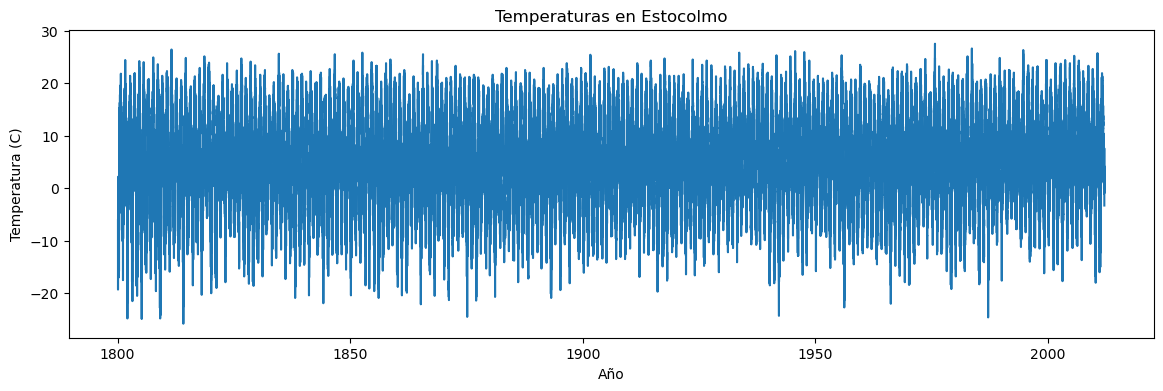

In [14]:
# Aunque esta parte de matplotlib la veremos más adelante, podríamos mostrar las temperaturas en cada año
import matplotlib.pyplot as plt
%matplotlib inline  

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(datos[:,0]+datos[:,1]/12.0+datos[:,2]/365, datos[:,5])
ax.axis('tight')
ax.set_title('Temperaturas en Estocolmo')
ax.set_xlabel('Año')
ax.set_ylabel('Temperatura (C)');

Utilizando `numpy.savetxt` también podemos guardar un array de numpy en un fichero de tipo CSV.

In [ ]:
M = np.random.rand(3,3)

M

In [ ]:
np.savetxt("matriz-aleatoria.csv", M)

Ver random-matrix.csv:

`7.103449585392968002e-01 7.900645048936851822e-01 9.628413390808148176e-01
1.028392978248801048e-01 4.928486134895194715e-01 4.541420349361398046e-01
5.832794193012934558e-01 7.280249796388597039e-01 6.718886135719061015e-01`

In [ ]:
# Podemos especificar también el formato con el que guardar los números (con 5 decimales por ejemplo)
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt especifica el formato

Ver random-matrix.csv:

`0.71034 0.79006 0.96284
0.10284 0.49285 0.45414
0.58328 0.72802 0.67189`

**Nota: Tu matriz puedes ser diferente porque son números aleatorios.**

Hay veces que nos resulta útil almacenar en disco y posteriormente volver a leer datos en un array de Numpy. En esos casos podemos utilizar el formato nativo mediante las funciones `numpy.save` y `numpy.load`:

In [ ]:
np.save("matriz-aleatoria.npy", M)

In [ ]:
np.load("matriz-aleatoria.npy")

# Procesamiento de datos / Funciones de reducción/agregación

A partir de las matrices, hay unas cuantas funciones básicas que nos permiten obtener estadísticas de los datos almacenados.

Por ejemplo, partiendo de los datos cargados del fichero de temperaturas de Stocolmo, podemos calcular una serie de estadísticas interesantes.

In [15]:
# los datos de la temperatura los tenemos en la variable datos
np.shape(datos)

(77431, 7)

In [16]:
# Nos quedamos con la tercera columna que tiene las temperaturas
    # Más adelante veremos el fundamento de esta operación
temperaturas = datos[:,3]

#### mean

In [17]:
# Los datos de la temperatura están en la columna 3
# con np.mean podemos calcular la temperatura media total
np.mean(temperaturas)

6.197109684751585

La temperatura media en Estocolmo en los últimos 200 años ha sido de unos 6,2ºC

#### standard deviations y variance
Podemos calcular la desviación estándar y la varianza con `np.std` y `np.var`, respectivamente.

In [ ]:
np.std(temperaturas), np.var(temperaturas)

#### min y max

In [19]:
# Podemos obtener la temperatura mínima
temperaturas.min()

NameError: name 'temperaturas' is not defined

In [ ]:
# Podemos obtener también la temperatura máxima
temperaturas.max()

#### argmin y argmax

In [ ]:
# Podemos obtener la posición de la temperatura mínima
temperaturas.argmin()

In [ ]:
# Podemos obtener también la posición de la temperatura máxima
temperaturas.argmax()

En todos los casos anteriores podemos utilizar indistintamente `np.función` o `array.función`.

#### sort y argsort

In [20]:
# Creamos un vector de datos desordenados
datosDesordenados = np.array([2,-12, 34, 10, -123])

# Ordenamos los datos (esta función los ordena de menor a mayor)
datosMenorMayor = np.sort(datosDesordenados)
print(datosMenorMayor)
# Para ordenarlos de mayor a menor cogemos el array de numpy de atrás hacia adelante (paso -1)
datosMayorMenor = datosMenorMayor[::-1]
print(datosMayorMenor)

[-123  -12    2   10   34]
[  34   10    2  -12 -123]


In [21]:
# Ordenamos los datos pero cogemos los índices 
indicesDatosMenorMayor = np.argsort(datosDesordenados)
print(indicesDatosMenorMayor)

[4 1 0 3 2]


#### sum, prod, and trace
Hay más funciones como `sum` para realizar la suma, `prod` para obtener le producto y `trace` para hacer la suma de los valores en la diagonal de una matriz.

In [22]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
# Sumamos todos los elementos
np.sum(d)

45

In [24]:
# Producto de todos los elementos
np.prod(d+1) # El +1 es para evitar el primer 0 y que el producto, por tanto, sea 0

3628800

In [25]:
# Suma acumulada
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [26]:
# Producto acumulado
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [27]:
A = np.random.rand(5,5)
print(A)
# Trace es lo mismo que diag(A).sum()
np.trace(A)

[[0.81512187 0.58945696 0.0021594  0.10820723 0.18451347]
 [0.98096527 0.54176469 0.72361453 0.8378099  0.28426729]
 [0.63331908 0.54166588 0.06871958 0.14025843 0.06125704]
 [0.87118723 0.60992825 0.86890086 0.72297363 0.56187814]
 [0.18854927 0.01251582 0.98743471 0.88468141 0.71899508]]


2.8675748527884903

## Funciones de agregación por filas o por columnas

Todas las funciones vistas en el último apartado (suma, media, máximo, mínimo...) pueden aplicarse también para obtener la suma de todos los valores por cada fila o columna de una matriz, lo que suele ser de gran utilidad.

Por defecto, como hemos visto realizan la agregación de todos los elementos en el array.

In [28]:
x = np.array([1, 2, 3, 4])
np.sum(x)

10

In [29]:
x.sum()

10

Sin embargo, cuando tenemos un array de más de una dimensión podemos aplicar la función por ejes, a traves del parámetro `axis`

In [30]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [31]:
# Suma por columnas (obtenemos la suma de los elementos en cada fila)
x.sum(axis=1)

array([2, 4])

In [32]:
# Suma por filas (obtenemos la suma de los elementos en cada columna)
x.sum(axis=0)

array([3, 3])

## Indexación simple

Para acceder a los elementos de un array simplemente debemos usar los índices entre corchetes.

In [33]:
# v es un vector que solo tiene una dimensión, por lo que solo requiere de un índice
v[0]

1

In [34]:
# M es una matriz, o un array de 2 dimensiones, por lo que necesita dos índices para acceder al elemento correspondiente (fila,columna)
M[1,1]

4

Si omitimos algún índice en un array multidimensional, nos devolverá toda la fila (o, en general, un array con una dimensión menos)

In [35]:
M

array([[1, 2],
       [3, 4]])

In [36]:
# La fila 1 (es la segunda porque la indexación comienza en 0)
M[1]

array([3, 4])

Ocurre lo mismo si utilizamos `:` como comodín para indicar que queremos seleccionar todas las columnas (podemos hacer lo mismo para seleccionar todas las filas de una columna)

In [37]:
M[1,:] # fila 1

array([3, 4])

In [38]:
M[:,1] # columna 1

array([2, 4])

Los arrays son mutables y por tanto podemos asignar nuevos valores a los elementos de un array usando la indexación.

In [39]:
M[0,0] = 1

In [40]:
M

array([[1, 2],
       [3, 4]])

In [41]:
# También funciona para poder dar valores a toda una fila o columna
M[1,:] = 0
M[:,2] = -1

IndexError: index 2 is out of bounds for axis 1 with size 2

In [42]:
M

array([[1, 2],
       [0, 0]])

# Álgebra lineal

Hemos visto que por defecto en Python la multiplicación entre arrays se hace elemento por elemento, pero ¿qué pasa si queremos hacer la multiplicación entre matrices?

Para ello está la función `dot` que permite realizar la multiplicación entre matrices, vectores y matrices o entre los vectores mismos (producto escalar).

In [ ]:
A

In [43]:
np.dot(A, A)

array([[1.3730867 , 0.86930389, 0.70466455, 0.82382445, 0.51156012],
       [2.57282516, 1.77826486, 1.45254272, 1.51873685, 1.05446762],
       [1.22485039, 0.7903071 , 0.58040527, 0.68757736, 0.39789501],
       [2.5945208 , 1.76261333, 1.68595507, 1.74691737, 1.19756541],
       [1.6976186 , 1.201373  , 1.55598102, 1.44506723, 1.11287212]])

In [72]:
v1 = np.arange(0,5)
v1

array([0, 1, 2, 3, 4])

In [45]:
np.dot(A, v1)

array([1.65645132, 5.63949262, 1.3449085 , 6.76416341, 7.51740979])

In [46]:
np.dot(v1, v1)

30

### Funciones para trabajar con matrices
Existe una gran variedad de funciones con las que podemos hacer diferentes cómputos sobre las matrices. Vamos a ver algunos ejemplos.

#### Inv

Permite calcular la inversa de una matriz.

In [53]:
A = np.random.rand(3,3)
A

array([[0.30862286, 0.71435388, 0.32684151],
       [0.83711476, 0.3395352 , 0.09600247],
       [0.62281749, 0.09630391, 0.20508916]])

In [54]:
np.linalg.inv(A) 

array([[-0.58033518,  1.10542302,  0.4074047 ],
       [ 1.07525791,  1.34794971, -2.3445677 ],
       [ 1.25745974, -3.98992137,  4.73965694]])

In [49]:
np.linalg.inv(A).dot(A) # Nos debería de dar la matriz identidad

array([[ 1.00000000e+00, -1.07920477e-17, -1.26098338e-18],
       [ 4.13025456e-16,  1.00000000e+00,  8.59935475e-17],
       [-3.13169338e-17, -2.71019596e-17,  1.00000000e+00]])

#### Det
Permite calcular el determinante de una matriz.

In [55]:
np.linalg.det(A)

-0.10405982178659762

# Más funcionalidades de numpy

## Cambiando la forma de los arrays: Reshape, resize and (h/v)stack

La forma de los arrays de Numpy se puede cambiar sin necesidad de copiar los datos que tenemos almacenados, lo que hace que sea una operación muy rápida incluso cuando tenemos arrays grandes.

In [56]:
A

array([[0.30862286, 0.71435388, 0.32684151],
       [0.83711476, 0.3395352 , 0.09600247],
       [0.62281749, 0.09630391, 0.20508916]])

In [57]:
n, m = A.shape

In [58]:
B = A.reshape((1,n*m)) # La convertimos en vector fila
B

array([[0.30862286, 0.71435388, 0.32684151, 0.83711476, 0.3395352 ,
        0.09600247, 0.62281749, 0.09630391, 0.20508916]])

In [59]:
A.reshape((1, -1))

array([[0.30862286, 0.71435388, 0.32684151, 0.83711476, 0.3395352 ,
        0.09600247, 0.62281749, 0.09630391, 0.20508916]])

In [60]:
B[0,0:5] = 5 # modificamos el array

B

array([[5.        , 5.        , 5.        , 5.        , 5.        ,
        0.09600247, 0.62281749, 0.09630391, 0.20508916]])

In [ ]:
A # La variable original también cambia ya que B es solo una vista de los datos originales

Podemos usar la función `flatten` para convertir un array de mayores dimensiones en un vector, pero esta función COPIA los datos.

In [61]:
B = A.flatten()

B

array([5.        , 5.        , 5.        , 5.        , 5.        ,
       0.09600247, 0.62281749, 0.09630391, 0.20508916])

In [62]:
B[0:5] = 10

B

array([10.        , 10.        , 10.        , 10.        , 10.        ,
        0.09600247,  0.62281749,  0.09630391,  0.20508916])

In [63]:
A # Ahora A no ha cambiado, ya que los datos en B son una copia de A (no son los mismos valores en memoria)

array([[5.        , 5.        , 5.        ],
       [5.        , 5.        , 0.09600247],
       [0.62281749, 0.09630391, 0.20508916]])

In [64]:
A.ravel() # Crea una vista

array([5.        , 5.        , 5.        , 5.        , 5.        ,
       0.09600247, 0.62281749, 0.09630391, 0.20508916])

Podemos obtener la transpuesta de una matriz utilizando el atributo T. Esta método devuelve una VISTA de los datos.

In [65]:
B = A.T
B

array([[5.        , 5.        , 0.62281749],
       [5.        , 5.        , 0.09630391],
       [5.        , 0.09600247, 0.20508916]])

In [66]:
# Si modificamos B también modificamos A puesto que B es una vista de los datos de A
B[1] = 3
print(B)
print(A)

[[5.         5.         0.62281749]
 [3.         3.         3.        ]
 [5.         0.09600247 0.20508916]]
[[5.         3.         5.        ]
 [5.         3.         0.09600247]
 [0.62281749 3.         0.20508916]]


## Combinando y repitiendo arrays

Utilizando las funciones `repeat`, `tile`, `vstack`, `hstack`, y `concatenate` podemos crear arrays más grandes a partir de combinar diferentes arrays.

### tile and repeat

Estas funciones permiten replicar los datos de un array de diferentes formas.

In [19]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [20]:
# Repite cada elemento 3 veces (devuelve un vector)
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [21]:
# Replica la matriz 3 veces (se crearán nuevas columnas)
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [22]:
# Se puede especificar cómo se debe replicar
c = np.array([1,2,3,4])

np.tile(c,(4,1))

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

### concatenate
Esta función permite unir dos arrays. Debemos indicarle si quiere añadir el nuevo array como nuevas filas `(axis=0)` o como nuevas columnas `(axis=1)`. En cualquier caso, las dimensiones deben ser compatibles.

In [23]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [24]:
# Concatenamos a con b, añadiendo b como una nueva fila. Debemos pasar los arrays como tupla
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
# Concatenamos a con b, añadiendo b como una nueva columna. Debemos pasar los arrays como tupla
np.concatenate((a, b.T), axis=1)

### hstack and vstack
Son lo mismo que `concatenate` pero la foma en la que concatenamos los arrays viene dada por el nombre de la función y no por el parámetro axis.

In [ ]:
# Combinamos verticalmente a y b, equivalente a np.concatenate((a, b), axis=0)
np.vstack((a,b))

In [ ]:
# Combinamos horizontalmente a y b, equivalente a np.concatenate((a, b), axis=1)
np.hstack((a,b.T))

## Vistas y copias de datos

Como hemos mencionado antes, para hacer que numpy sea realmente rápido, las asignaciones generalmente no copian los datos de los objetos (evitamos sobrecargar la memoria también). Sin embargo, hay veces en las que realmente queremos hacer esa copia. Lo podemos indicar mediante la función `copy`. 

In [ ]:
A = np.array([[1, 2], [3, 4]])

A

In [ ]:
# Ahora B se refiere al mismo array de datos que A (NO SE COPIAN LOS DATOS)
B = A 

In [ ]:
# Si cambiamos B, también afecta a A
B[0,0] = 10

B

In [ ]:
A

Para evitar que ocurra esto, cuando queremos un nuevo array completamente independiente, debemos indicarlo haciendo una copia "profunda" del objeto mediante la función `copy`.

In [ ]:
B = np.copy(A)

In [ ]:
# Ahora, aunque modifiquemos B, A no se verá afectado
B[0,0] = -5

B

In [ ]:
A

## Iteraciones sobre elementos de un array

Generalmente, siempre que se pueda evitaremos iterar sobre los elementos de un array debido a que esto resulta muy lento y poco eficiente. Por ello es conveniente siempre que se pueda usar las operaciones vectorizadas.

Sin embargo, algunas veces esto es inevitable. En estos casos, el `for` de Python es la forma más sencilla y adecuada de iterar sobre un array.

In [ ]:
v = np.array([1,2,3,4])

# Iteramos sobre los elementos de v y los imprimimos
for elemento in v:
    print(elemento)

In [ ]:
M = np.array([[1,2], [3,4]])

# Podemos iterar sobre matrices, en cuyo caso, el primer for se hará sobre las filas y el segundo sobre las columnas
for fila in M:
    print("fila: ", fila)
    # Iteramos sobre los valores en cada fila
    for elemento in fila:
        print(elemento)

Cuando queremos iterar sobre los elementos de un array y modificarlos, lo mejor es utilizar `enumerate`. De esta forma, obtenemos tanto el elemento como su índice.

In [ ]:
# Iteramos sobre las filas
for indice_fila, fila in enumerate(M):
    print("indice_fila", indice_fila, "fila", fila)
    
    # Iteramos sobre el valor de cada fila (columnas)
    for indice_col, elemento in enumerate(fila):
        print("indice_col", indice_col, "elemento", elemento)
       
        # Actualizamos la matriz M elevando al cuadrado cada elemento. OJO!! NADA EFICIENTE (mejor sería M ** 2)
        M[indice_fila, indice_col] = elemento ** 2

In [ ]:
# Cada elemento en M ahora está elevado al cuadrado
M

## Utilizando los arrays en condicionales

Cuando utilizamos arrays en un condicional `if` u otra expresión de tipo booleano, necesitaremos utilizar `any` o `all` para combinar los valores booleanos de un array. Veámoslo con un ejemplo.

In [67]:
M

array([[1, 2],
       [0, 0]])

In [68]:
M > 5

array([[False, False],
       [False, False]])

In [69]:
# Comprobamos si ALGÚN elemento en M es mayor que 5
if (M > 5).any(): # any devuelve True si alguno de los elementos en el array es True y False en otro caso
    print("al menos un elemento de M es mayor que 5")
else:
    print("no hay ningún elemento en M que sea mayor que 5")

no hay ningún elemento en M que sea mayor que 5


In [70]:
# Comprobamos si TODOS los elementos en M son mayores que 5
if (M > 5).all(): # all devuelve True si todos los elementos en el array son True y False en otro caso
    print("todos los elementos en M son mayores que 5")
else:
    print("todos los elementos en M no son mayores que 5")

todos los elementos en M no son mayores que 5
